In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import pylab as py
import matplotlib.pyplot as plt
import sklearn.model_selection as mods
import sklearn.linear_model as sklin
import sklearn.tree as st
#import xgboost as xgb


In [3]:
df=pd.read_csv('c:/temp/TestPredictionResults/TestPredictionResults_23-03-19_06-08-06.csv')

In [4]:
df.head()

,TestProgram_Name_NA,Family,IsConcurrent,Patterns_Count,Tests_Count,Mtt_Count,ConcurrentFlows_Count,Shmoo_tests_count,ITuff_Temperature_NA,ITuff_SubmitterFullName_NA,ITuff_Lot_NA,ituff_EndDate_NA,ITuff_PartType_FromSpark,ITuff_BomGroup_FromSpark,ITuff_ProcessStep_FromSpark,ITuff_ExperimentType_FromSpark,ITuff_PerUnit_IsPassed_Target_NA,ITuff_PerUnit_testTimeInMS_Target
0,RPL_1ST_SILICON,RPL,False,20355,14801,0,0,248,100,"Savadatti, Shravanakumar",Y311131CR,3/19/2023 6:05:57 PM,H64BJQAVAB,CLASS_RPL8161S_BGA,CLASSHOT,Correlation,True,357.691731
1,RPL_1ST_SILICON,RPL,False,20355,14801,0,0,248,100,"Savadatti, Shravanakumar",Y311131CR,3/19/2023 6:05:57 PM,H64BJQAVAB,CLASS_RPL8161S_BGA,CLASSHOT,Correlation,True,363.206417
2,RPL_1ST_SILICON,RPL,False,20355,14801,0,0,248,100,"Savadatti, Shravanakumar",Y311131CR,3/19/2023 6:05:57 PM,H64BJQAVAB,CLASS_RPL8161S_BGA,CLASSHOT,Correlation,True,363.616004
3,RPL_1ST_SILICON,RPL,False,20355,14801,0,0,248,100,"Savadatti, Shravanakumar",Y311131CR,3/19/2023 6:05:57 PM,H64BJQAVAB,CLASS_RPL8161S_BGA,CLASSHOT,Correlation,True,357.596088
4,RPL_1ST_SILICON,RPL,False,20355,14801,0,0,248,100,"Savadatti, Shravanakumar",Y311131CR,3/19/2023 6:05:57 PM,H64BJQAVAB,CLASS_RPL8161S_BGA,CLASSHOT,Correlation,True,367.486744


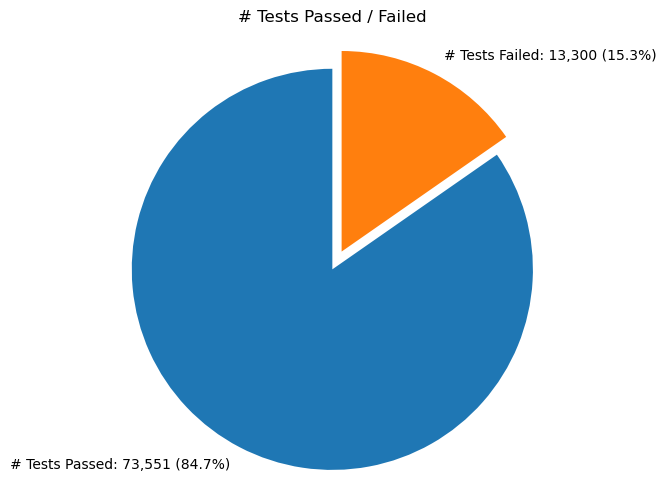

In [5]:
# Graph of Tests Passed / Failed

# data on number of tests passed and failed
testFailureData = {'# Tests Passed': len(df[df['ITuff_PerUnit_IsPassed_Target_NA'] == True]), '# Tests Failed': len(df[df['ITuff_PerUnit_IsPassed_Target_NA'] == False])}

# Convert the dictionary to a pandas DataFrame
df1 = pd.DataFrame.from_dict(testFailureData, orient='index', columns=['Tests'])

# create a pie chart
fig, ax = plt.subplots(figsize=(8, 6))
explode = (0.1, 0)  # explode the first slice

# calculate the percentages and display them on the chart
percentages = df1['Tests'] / df1['Tests'].sum() * 100
labels = [f'{df1.index[i]}: {df1.Tests[i]:,.0f} ({percentages[i]:.1f}%)' for i in range(len(df1))]
ax.pie(df1['Tests'], explode=explode, labels=labels, autopct='', startangle=90)
ax.axis('equal')

# set the title of the chart
plt.title('# Tests Passed / Failed')

# display the chart
plt.show()


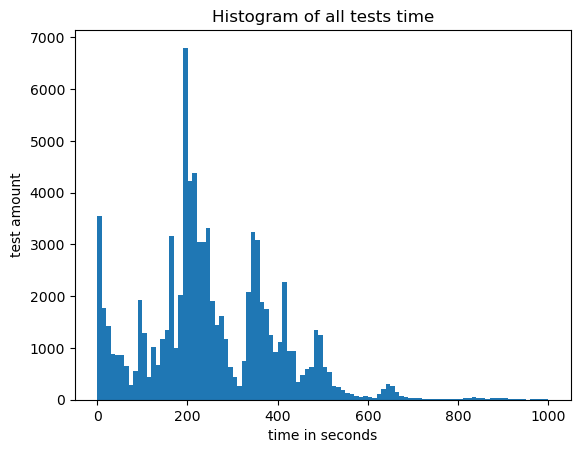

In [6]:
# all tests time histogrm
all_tests_time = df[df['ITuff_PerUnit_testTimeInMS_Target']<1000]
plt.hist(all_tests_time['ITuff_PerUnit_testTimeInMS_Target'], bins=100)

# Add labels and titles
plt.xlabel('time in seconds')
plt.ylabel('test amount')
plt.title('Histogram of all tests time')

# Show the plot
plt.show()

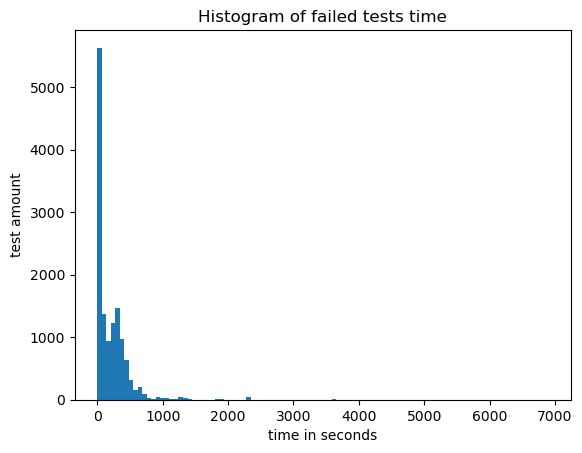

In [7]:
# failed tests time histogrm

failed_records = df[df['ITuff_PerUnit_IsPassed_Target_NA'] == False]

plt.hist(failed_records['ITuff_PerUnit_testTimeInMS_Target'], bins=100)

# Add labels and titles
plt.xlabel('time in seconds')
plt.ylabel('test amount')
plt.title('Histogram of failed tests time')

# Show the plot
plt.show()

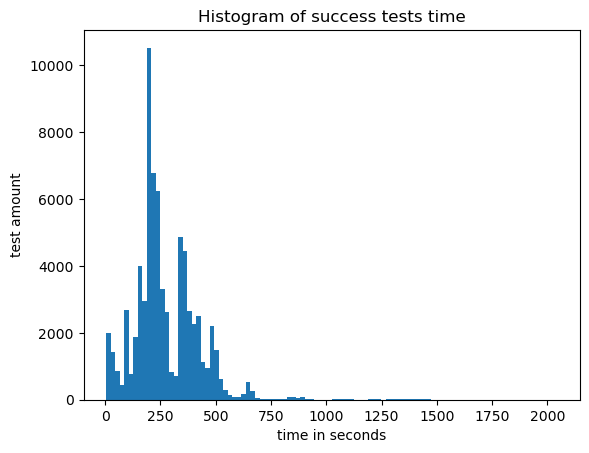

In [8]:
# success tests time histogrm

success_records = df[df['ITuff_PerUnit_IsPassed_Target_NA'] == True]

plt.hist(success_records['ITuff_PerUnit_testTimeInMS_Target'], bins=100)

# Add labels and titles
plt.xlabel('time in seconds')
plt.ylabel('test amount')
plt.title('Histogram of success tests time')

# Show the plot
plt.show()

In [9]:
min_time = 100
max_time = 550

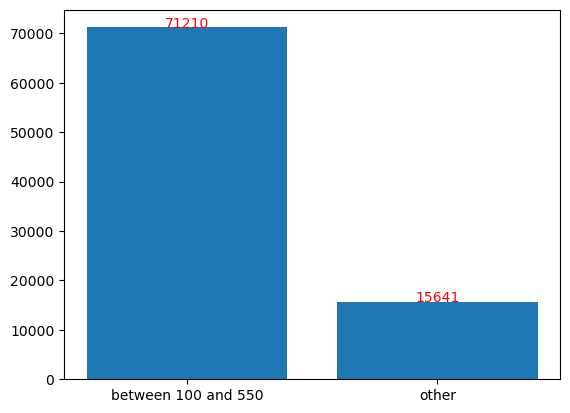

In [10]:
# add graph of how many above max_time

total = len(df['ITuff_PerUnit_testTimeInMS_Target'])

filtered_by_min_and_max = df[(df['ITuff_PerUnit_testTimeInMS_Target'] > max_time) | (df['ITuff_PerUnit_testTimeInMS_Target']< min_time)]
count = len(filtered_by_min_and_max)
#print(len(df[df['ITuff_PerUnit_testTimeInMS_Target'] > max_time]))

categories = ['between '+str(min_time) + ' and ' +str(max_time), 'other']
values = [total-count, count]

# Set up the figure and axis
fig, ax = plt.subplots()

# Set the x-axis ticks and labels
ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories)

# Create the bar plot
ax.bar(range(len(categories)), values)

# Add values to the bars
for i, val in enumerate(values):
    ax.text(i, val + 0.5, str(val), ha='center', fontsize=10, color='red')

# Show the plot
plt.show()

In [11]:
print(len(filtered_by_min_and_max))
df = df.drop(filtered_by_min_and_max.index)

15641


In [12]:
#sb.pairplot(df.head(5)) # after dummies

In [13]:
#sb.displot(df['Shmoo_tests_count'])

In [14]:
df.corr()

,IsConcurrent,Patterns_Count,Tests_Count,Mtt_Count,ConcurrentFlows_Count,Shmoo_tests_count,ITuff_Temperature_NA,ITuff_PerUnit_IsPassed_Target_NA,ITuff_PerUnit_testTimeInMS_Target
IsConcurrent,1.000000,-0.422452,0.243566,NaN,0.999868,0.485383,0.000149,0.000132,0.275280
Patterns_Count,-0.422452,1.000000,0.442983,NaN,-0.422276,-0.114358,-0.079834,0.111045,0.013051
Tests_Count,0.243566,0.442983,1.000000,NaN,0.243662,0.674150,-0.035375,0.091986,0.311731
Mtt_Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ConcurrentFlows_Count,0.999868,-0.422276,0.243662,NaN,1.000000,0.484916,-0.000151,0.000008,0.274433
Shmoo_tests_count,0.485383,-0.114358,0.674150,NaN,0.484916,1.000000,0.063576,0.002633,0.455367
ITuff_Temperature_NA,0.000149,-0.079834,-0.035375,NaN,-0.000151,0.063576,1.000000,-0.120065,0.338127
ITuff_PerUnit_IsPassed_Target_NA,0.000132,0.111045,0.091986,NaN,0.000008,0.002633,-0.120065,1.000000,-0.005152
ITuff_PerUnit_testTimeInMS_Target,0.275280,0.013051,0.311731,NaN,0.274433,0.455367,0.338127,-0.005152,1.000000


In [15]:
df.describe()

,Patterns_Count,Tests_Count,Mtt_Count,ConcurrentFlows_Count,Shmoo_tests_count,ITuff_Temperature_NA,ITuff_PerUnit_testTimeInMS_Target
count,71210.000000,71210.000000,71210.0,71210.000000,71210.000000,71210.000000,71210.000000
mean,17604.007724,13321.526429,0.0,1.594790,278.899621,63.103286,281.081703
std,4517.704549,2751.991037,0.0,1.496618,142.805043,48.511121,106.205334
min,341.000000,830.000000,0.0,0.000000,1.000000,-5.000000,100.020645
25%,16001.000000,13095.000000,0.0,0.000000,216.000000,0.000000,198.446821
50%,17440.000000,13658.000000,0.0,3.000000,248.000000,95.000000,244.180477
75%,20305.000000,14801.000000,0.0,3.000000,314.000000,100.000000,359.434595
max,57800.000000,19752.000000,0.0,3.000000,589.000000,100.000000,549.973772


In [16]:
df.groupby('IsConcurrent').count()

,TestProgram_Name_NA,Family,Patterns_Count,Tests_Count,Mtt_Count,ConcurrentFlows_Count,Shmoo_tests_count,ITuff_Temperature_NA,ITuff_SubmitterFullName_NA,ITuff_Lot_NA,ituff_EndDate_NA,ITuff_PartType_FromSpark,ITuff_BomGroup_FromSpark,ITuff_ProcessStep_FromSpark,ITuff_ExperimentType_FromSpark,ITuff_PerUnit_IsPassed_Target_NA,ITuff_PerUnit_testTimeInMS_Target
IsConcurrent,,,,,,,,,,,,,,,,,
False,33341,33341,33341,33341,33341,33341,33341,33341,33341,33341,33341,33341,33341,33341,33341,33341,33341
True,37869,37869,37869,37869,37869,37869,37869,37869,37869,37869,37869,37869,37869,37869,37869,37869,37869


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71210 entries, 0 to 86850
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   TestProgram_Name_NA                71210 non-null  object 
 1   Family                             71210 non-null  object 
 2   IsConcurrent                       71210 non-null  bool   
 3   Patterns_Count                     71210 non-null  int64  
 4   Tests_Count                        71210 non-null  int64  
 5   Mtt_Count                          71210 non-null  int64  
 6   ConcurrentFlows_Count              71210 non-null  int64  
 7   Shmoo_tests_count                  71210 non-null  int64  
 8   ITuff_Temperature_NA               71210 non-null  int64  
 9   ITuff_SubmitterFullName_NA         71210 non-null  object 
 10  ITuff_Lot_NA                       71210 non-null  object 
 11  ituff_EndDate_NA                   71210 non-null  obj

In [18]:
df.drop(['TestProgram_Name_NA','ITuff_Temperature_NA','ITuff_SubmitterFullName_NA','ITuff_Lot_NA', 'ituff_EndDate_NA','ITuff_PerUnit_IsPassed_Target_NA'], axis=1, inplace=True)
#df.drop(['ConcurrentFlows_Count'], axis=1, inplace=True)                # ConcurrentFlows_Count doesn't change result
#df.drop(['IsConcurrent'], axis=1, inplace=True)                         # 'IsConcurrent' doesn’t change result
df.drop(['Family'], axis=1, inplace=True)                               # 'Family' doesn’t change result
#df.drop(['Patterns_Count'], axis=1, inplace=True)                       # Patterns_Count helps a little
#df.drop(['Tests_Count'], axis=1, inplace=True)                         # Tests_Count helps a little
#df.drop(['Shmoo_tests_count'], axis=1, inplace=True)                   # Shmoo_tests_count helps a little
df.drop(['ITuff_BomGroup_FromSpark'], axis=1, inplace=True)
#df.drop(['ITuff_ProcessStep_FromSpark'], axis=1, inplace=True)         # ITuff_ProcessStep_FromSpark is critical
#df.drop(['ITuff_ExperimentType_FromSpark'], axis=1, inplace=True)      # ITuff_ExperimentType_FromSpark helps a little

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71210 entries, 0 to 86850
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IsConcurrent                       71210 non-null  bool   
 1   Patterns_Count                     71210 non-null  int64  
 2   Tests_Count                        71210 non-null  int64  
 3   Mtt_Count                          71210 non-null  int64  
 4   ConcurrentFlows_Count              71210 non-null  int64  
 5   Shmoo_tests_count                  71210 non-null  int64  
 6   ITuff_PartType_FromSpark           71210 non-null  object 
 7   ITuff_ProcessStep_FromSpark        71210 non-null  object 
 8   ITuff_ExperimentType_FromSpark     71210 non-null  object 
 9   ITuff_PerUnit_testTimeInMS_Target  71210 non-null  float64
dtypes: bool(1), float64(1), int64(5), object(3)
memory usage: 5.5+ MB


In [20]:
#df = pd.get_dummies(df, columns =['Family'])
df = pd.get_dummies(df, columns =['ITuff_PartType_FromSpark'])
#df = pd.get_dummies(df, columns =['ITuff_BomGroup_FromSpark'])
df = pd.get_dummies(df, columns =['ITuff_ProcessStep_FromSpark'])
df = pd.get_dummies(df, columns =['ITuff_ExperimentType_FromSpark'])


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71210 entries, 0 to 86850
Data columns (total 78 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   IsConcurrent                                71210 non-null  bool   
 1   Patterns_Count                              71210 non-null  int64  
 2   Tests_Count                                 71210 non-null  int64  
 3   Mtt_Count                                   71210 non-null  int64  
 4   ConcurrentFlows_Count                       71210 non-null  int64  
 5   Shmoo_tests_count                           71210 non-null  int64  
 6   ITuff_PerUnit_testTimeInMS_Target           71210 non-null  float64
 7   ITuff_PartType_FromSpark_H64ADNSVAL         71210 non-null  uint8  
 8   ITuff_PartType_FromSpark_H64ADNWVBL         71210 non-null  uint8  
 9   ITuff_PartType_FromSpark_H64AHSFVCC         71210 non-null  uint8  
 10  ITuff_Part

In [22]:
df.describe()

,Patterns_Count,Tests_Count,Mtt_Count,ConcurrentFlows_Count,Shmoo_tests_count,ITuff_PerUnit_testTimeInMS_Target,ITuff_PartType_FromSpark_H64ADNSVAL,ITuff_PartType_FromSpark_H64ADNWVBL,ITuff_PartType_FromSpark_H64AHSFVCC,ITuff_PartType_FromSpark_H64ALNAVBJ,...,ITuff_ProcessStep_FromSpark_CLASSHOT,ITuff_ProcessStep_FromSpark_CLASSHOTR,ITuff_ProcessStep_FromSpark_CSM,ITuff_ProcessStep_FromSpark_PHMCOLD,ITuff_ProcessStep_FromSpark_PHMCOLDR,ITuff_ProcessStep_FromSpark_PHMHOT,ITuff_ProcessStep_FromSpark_PHMHOTR,ITuff_ExperimentType_FromSpark_Correlation,ITuff_ExperimentType_FromSpark_Engineering,ITuff_ExperimentType_FromSpark_WalkTheLot
count,71210.000000,71210.000000,71210.0,71210.000000,71210.000000,71210.000000,71210.000000,71210.000000,71210.000000,71210.000000,...,71210.000000,71210.000000,71210.000000,71210.000000,71210.000000,71210.000000,71210.000000,71210.000000,71210.000000,71210.000000
mean,17604.007724,13321.526429,0.0,1.594790,278.899621,281.081703,0.000154,0.000070,0.014675,0.026794,...,0.487656,0.003384,0.027721,0.127721,0.007766,0.151861,0.003019,0.641708,0.357043,0.001250
std,4517.704549,2751.991037,0.0,1.496618,142.805043,106.205334,0.012428,0.008379,0.120249,0.161482,...,0.499851,0.058077,0.164173,0.333781,0.087781,0.358888,0.054865,0.479502,0.479131,0.035331
min,341.000000,830.000000,0.0,0.000000,1.000000,100.020645,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16001.000000,13095.000000,0.0,0.000000,216.000000,198.446821,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17440.000000,13658.000000,0.0,3.000000,248.000000,244.180477,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,20305.000000,14801.000000,0.0,3.000000,314.000000,359.434595,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,57800.000000,19752.000000,0.0,3.000000,589.000000,549.973772,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
#df.Family_RaptorLake.value_counts()

In [24]:
#sb.pairplot(df,hue='ITuff_PerUnit_testTimeInMS_Target',)

In [25]:
#plt.hist(df['ITuff_PerUnit_testTimeInMS_Target'])
#plt.show()

In [26]:
#sb.displot(df['ITuff_PerUnit_testTimeInMS_Target']) 

In [27]:
x = df.drop(['ITuff_PerUnit_testTimeInMS_Target'],axis=1)
y = df.ITuff_PerUnit_testTimeInMS_Target

In [28]:
x_train, x_test, y_train, y_test = mods.train_test_split(x, y, test_size=0.30,random_state=101)

In [29]:
model = sklin.LinearRegression()
#model = XGBRegressor(objective="reg:squarederror", random_state=42)


In [30]:
model.fit(x_train,y_train)

LinearRegression()

In [31]:
y_pred = model.predict(x_test)

In [32]:
y_check = y_pred / y_test * 100

Text(0, 0.5, 'tests amount')

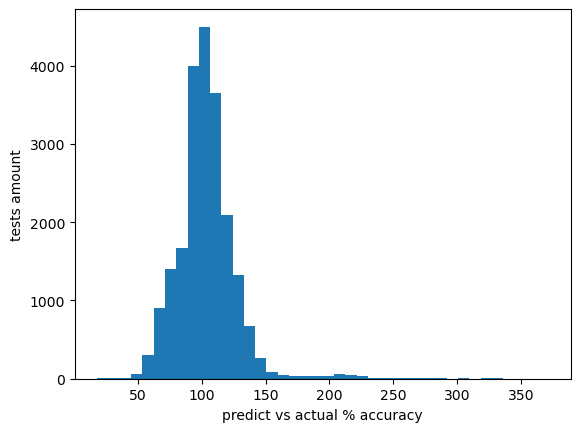

In [33]:
plt.hist(y_check, 40)
plt.xlabel('predict vs actual % accuracy')
plt.ylabel('tests amount')

In [34]:
# add percentage bar plot

In [35]:
import matplotlib.pyplot as plt

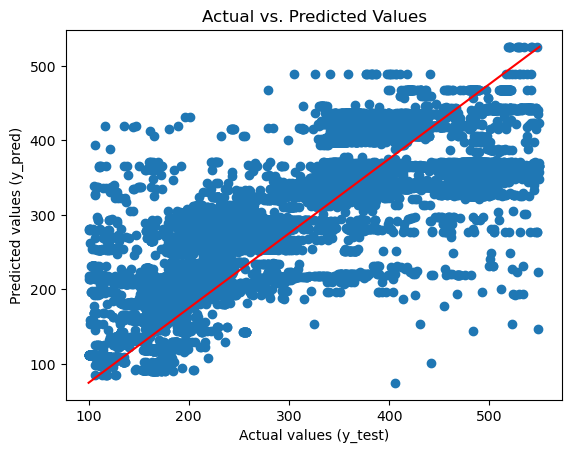

In [36]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)],'--', color='red')
plt.xlabel('Actual values (y_test)')
plt.ylabel('Predicted values (y_pred)')
plt.title('Actual vs. Predicted Values')
plt.show()

In [37]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [38]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# print the results
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R-squared: ", r2)
print("MAE: ", mae)

MSE:  3513.956944656567
RMSE:  59.278638181528486
R-squared:  0.6909930704537472
MAE:  42.731167110393656
